# generating ricker wavelet and reflectiviy series 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat,loadmat
import os

In [44]:
from ricker_wavelet import *

In [45]:
#defining parameters
frequency = 25
dt = 0.004
length = 0.1 
w,t = ricker_wavelet(frequency, dt, length,0)
directory = '.\data'
filename = os.path.join(directory, 'ricker.mat')
savemat(filename, {'w': w})

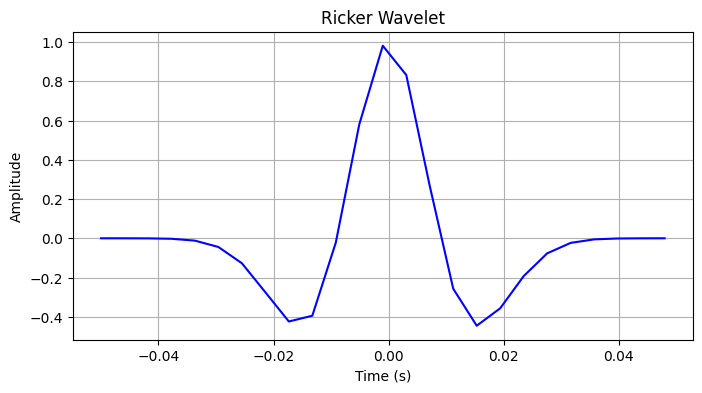

In [46]:
 # plotting the wavelet
plt.figure(figsize=(8, 4))
plt.plot(t, w, color='blue')
plt.title('Ricker Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# reflectivity series  

In [47]:
from random_reflectivity import *

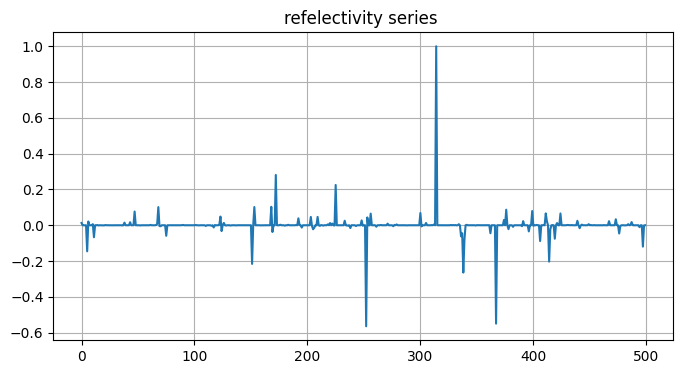

500

In [48]:
r=random_reflectivity (20*len(w))
directory = '.\data'
filename = os.path.join(directory, 'reflectivity.mat')
savemat(filename, {'r': r})
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('refelectivity series ')
plt.grid(True)
plt.show()
len(r)#convolution of walelet and reflectivity

# data with or without noise 

In [49]:
from gen_data import *

# read and write the data 

In [50]:
A,B=generate_data(w,r,4)
directory = './data/noise_free'
filename = os.path.join(directory, 'data.mat')
savemat(filename, {'d': A})

In [51]:
data = loadmat(filename)
d = data['d'].flatten()
directory = './data/noisy'
filename = os.path.join(directory, 'data_noise.mat')
savemat(filename, {'dnew': B})
data = loadmat(filename)
dnew = data['dnew'].flatten()

(524,)

<Figure size 640x480 with 0 Axes>

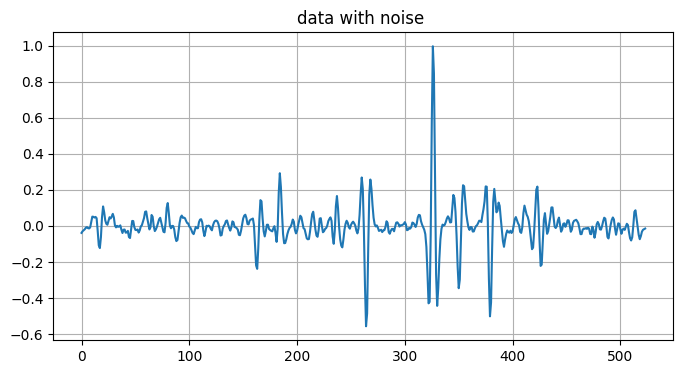

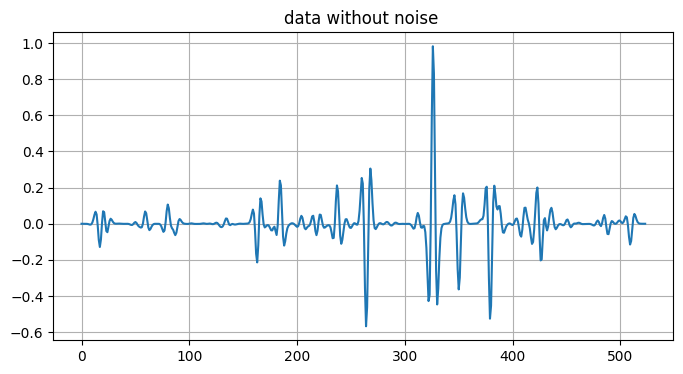

In [52]:
plt.figure(1)
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.title('data with noise ')
plt.plot(dnew)
plt.figure(2)
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.title('data without noise ')
plt.plot(d)
d.shape

# toeplitz matrix

In [53]:
from toep import *

In [54]:
p=len(d)
q=len(w)
xo=np.hstack((np.zeros(p-q+1))) #initial guess
A=toep(p,w)

# decon by gradient descent

# solution of without noise data

In [55]:
from grad_des import *
from grad_des_reg import *

In [56]:
x_sol,final_iter=grad_des(A,d,xo,500)

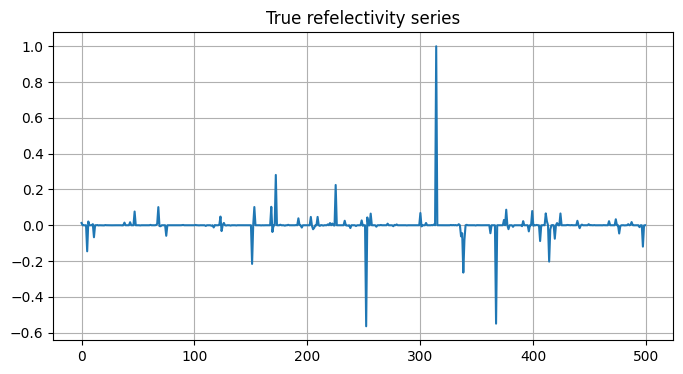

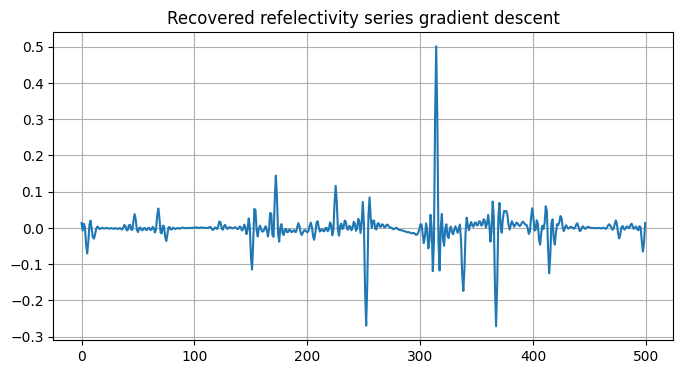

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol)
plt.title('Recovered refelectivity series gradient descent')
plt.grid(True)   
directory = './results/data'
figure_path = os.path.join(directory,'grad_des.png')
plt.savefig(figure_path)    

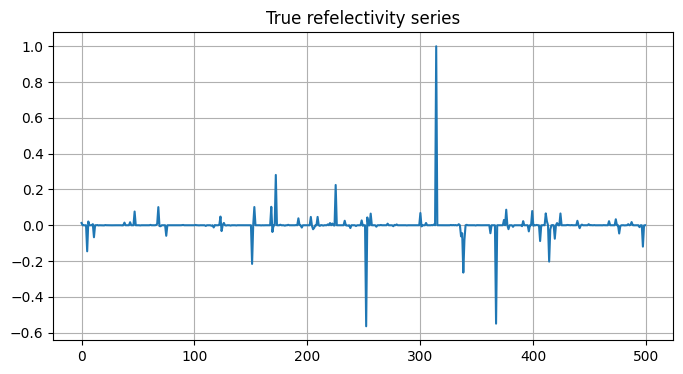

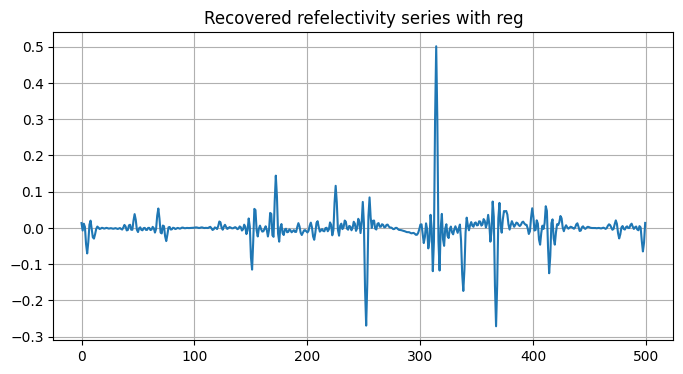

In [58]:
x_sol_reg,final_iter_reg=grad_des_reg(A,d,xo,0.0,500)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x_sol_reg)
plt.title('Recovered refelectivity series with reg')
plt.grid(True)
plt.show()

# solution of noisy data by gradient descent

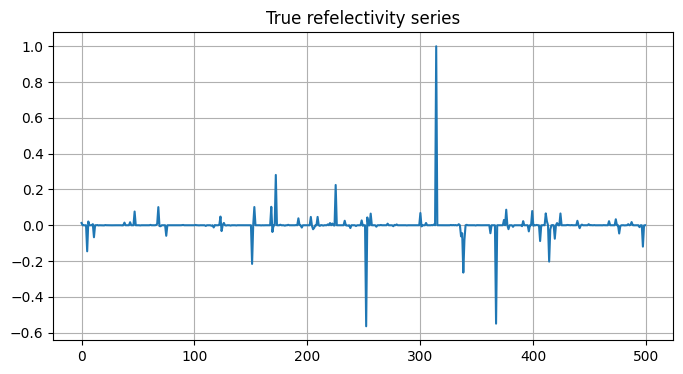

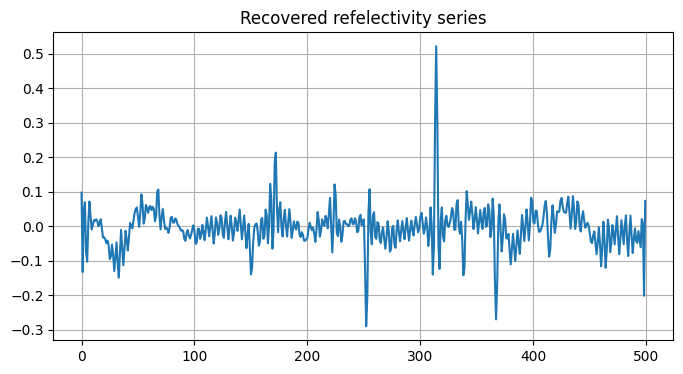

In [59]:
x_sol_noise, final_iter_noise=grad_des(A,dnew,xo,500)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_noise)
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'grad_des_noisy.png')
plt.savefig(figure_path)

# lambda by l2 norm 

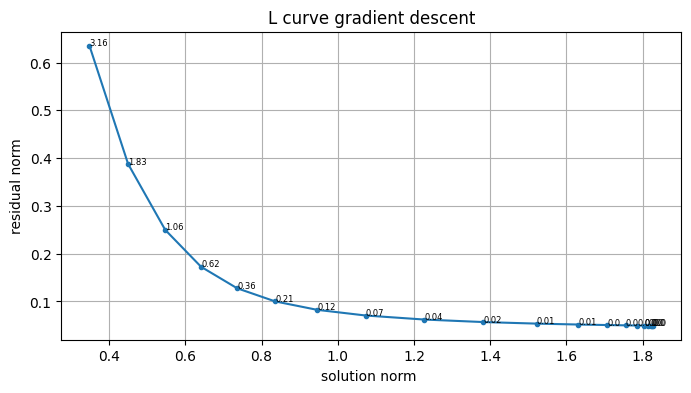

In [60]:
my_lambda=np.logspace(-4,0.5,20)
x=[]  #empty list for solution  norm
y=[]   #empty list for residual norm
for i in my_lambda:
    x_sol,itr=grad_des_reg(A,dnew,xo,i,500)
    x.append((np.linalg.norm(x_sol))**2) #calculating norm of solution 
    y.append((np.linalg.norm(dnew-np.dot(A,x_sol)))**2)#calculating norm of residual  
plt.figure(figsize=(8, 4))
plt.title('L curve gradient descent')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True) 
plt.plot(x,y,".-")
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],2)),fontsize=6)
# saving the L curve     
directory = './results/noisy_data'
figure_path = os.path.join(directory,'L_curve.png')
plt.savefig(figure_path)
plt.show()    

# apply band pass filter and Q factor 

In [61]:
from band_pass import *
from Q_factor import *

In [62]:
r_true=r
my_lambda=np.logspace(-3,0.5,20)
for i in my_lambda: 
    x_sol_noise_reg, final_iter=grad_des_reg(A,dnew,xo,i,500)
    r_sol=x_sol_noise_reg
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

0.7446 for lambda=0.001
0.7721 for lambda=0.0015283067326587688
0.8129 for lambda=0.002335721469090121
0.8727 for lambda=0.0035696988468260625
0.9585 for lambda=0.00545559478116852
1.0775 for lambda=0.008337822234717891
1.2344 for lambda=0.012742749857031334
1.4259 for lambda=0.01947483039908756
1.6351 for lambda=0.029763514416313176
1.8314 for lambda=0.04548777947003775
1.989 for lambda=0.06951927961775606
2.0795 for lambda=0.10624678308940409
2.1169 for lambda=0.1623776739188721
2.1111 for lambda=0.24816289228368238
2.0701 for lambda=0.37926901907322497
2.0009 for lambda=0.5796393953384967
1.9095 for lambda=0.8858667904100823
1.8012 for lambda=1.3538761800225432
1.6765 for lambda=2.069138081114788
1.5352 for lambda=3.1622776601683795


In [63]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
my_lambda=np.logspace(-3,0.5,20)
for i in my_lambda: 
    x_sol_noise_reg, final_iter=grad_des_reg(A,dnew,xo,i,500)
    r_sol=x_sol_noise_reg
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1,3 , 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

3.354 for lambda=0.001
3.3979 for lambda=0.0015283067326587688
3.4638 for lambda=0.002335721469090121
3.562 for lambda=0.0035696988468260625
3.7061 for lambda=0.00545559478116852
3.9133 for lambda=0.008337822234717891
4.2017 for lambda=0.012742749857031334
4.5843 for lambda=0.01947483039908756
5.0575 for lambda=0.029763514416313176
5.5894 for lambda=0.04548777947003775
6.1348 for lambda=0.06951927961775606
6.5831 for lambda=0.10624678308940409
6.8846 for lambda=0.1623776739188721
6.9914 for lambda=0.24816289228368238
6.8836 for lambda=0.37926901907322497
6.5845 for lambda=0.5796393953384967
6.1471 for lambda=0.8858667904100823
5.6276 for lambda=1.3538761800225432
5.0574 for lambda=2.069138081114788
4.4557 for lambda=3.1622776601683795


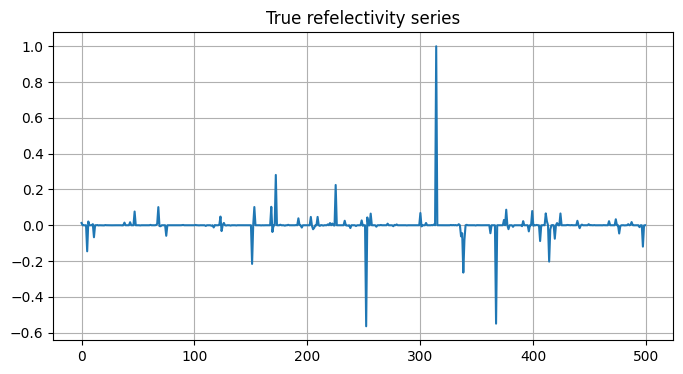

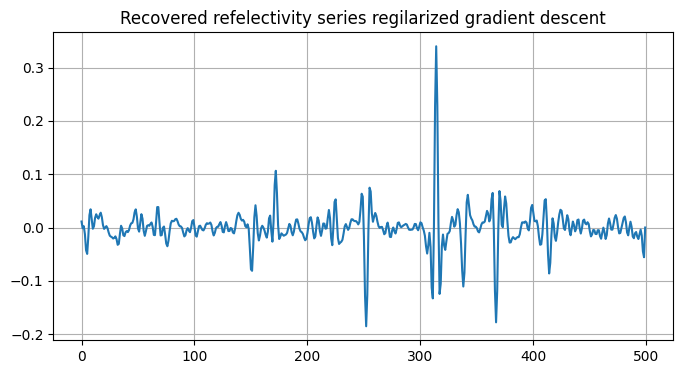

In [64]:
x_sol_noise_reg, final_iter_noise_reg=grad_des_reg(A,dnew,xo,0.58,500)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_noise_reg)
plt.title('Recovered refelectivity series regilarized gradient descent')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'grad_des_noisy_reg.png')
plt.savefig(figure_path)
plt.show() 

#  same problem by conjucate gradient

In [65]:
from conj_grad import *
from conj_grad_reg import *

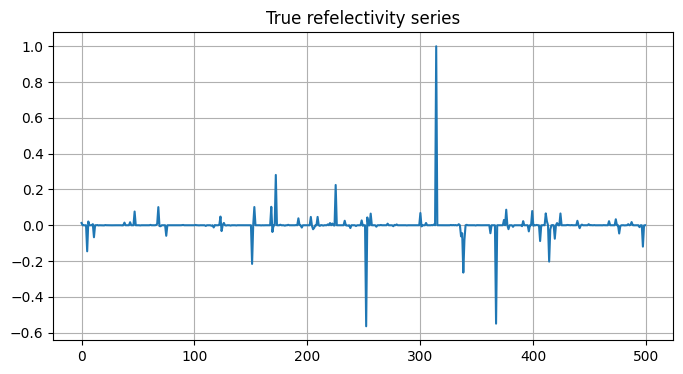

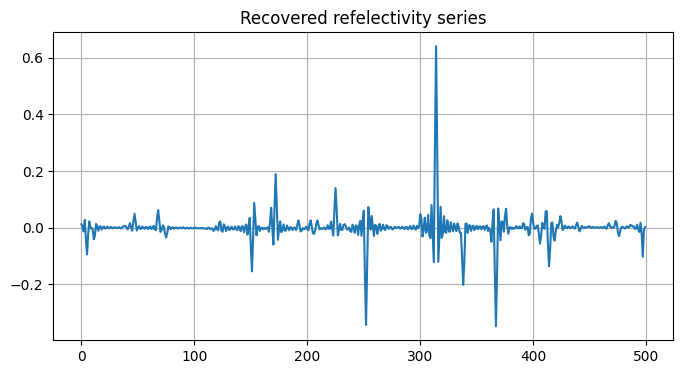

In [66]:
x_sol_cg, final_iter_cg=conj_grad(A, d, xo, 500,tol=0.000001)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_cg)
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/data'
figure_path = os.path.join(directory,'conj_grad.png')
plt.savefig(figure_path)

# solution of noisy data by conjugate gradient

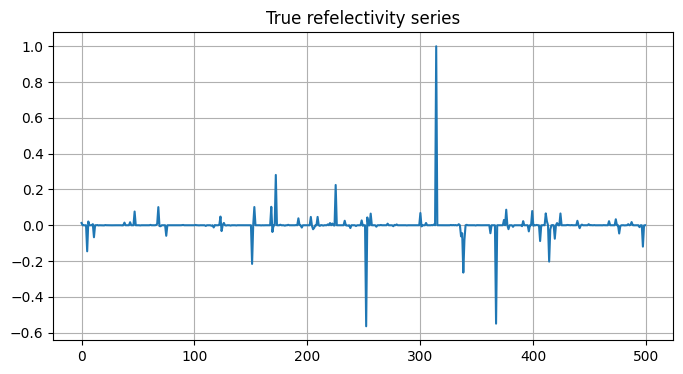

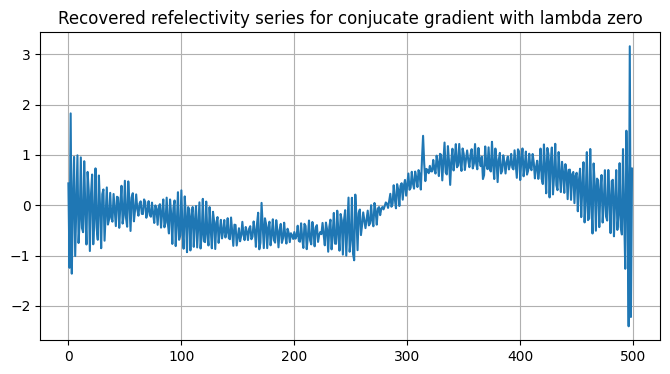

In [67]:
x_sol_cg_noise, final_iter_cg_noise=conj_grad(A, dnew, xo, 500,tol=0.000001)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_cg_noise)
plt.title('Recovered refelectivity series for conjucate gradient with lambda zero')
plt.grid(True)
directory = './results/noisy_data'
figure_path= os.path.join(directory, 'conj_grad_noisy.png')
plt.savefig(figure_path)

# lambda by l2 norm 

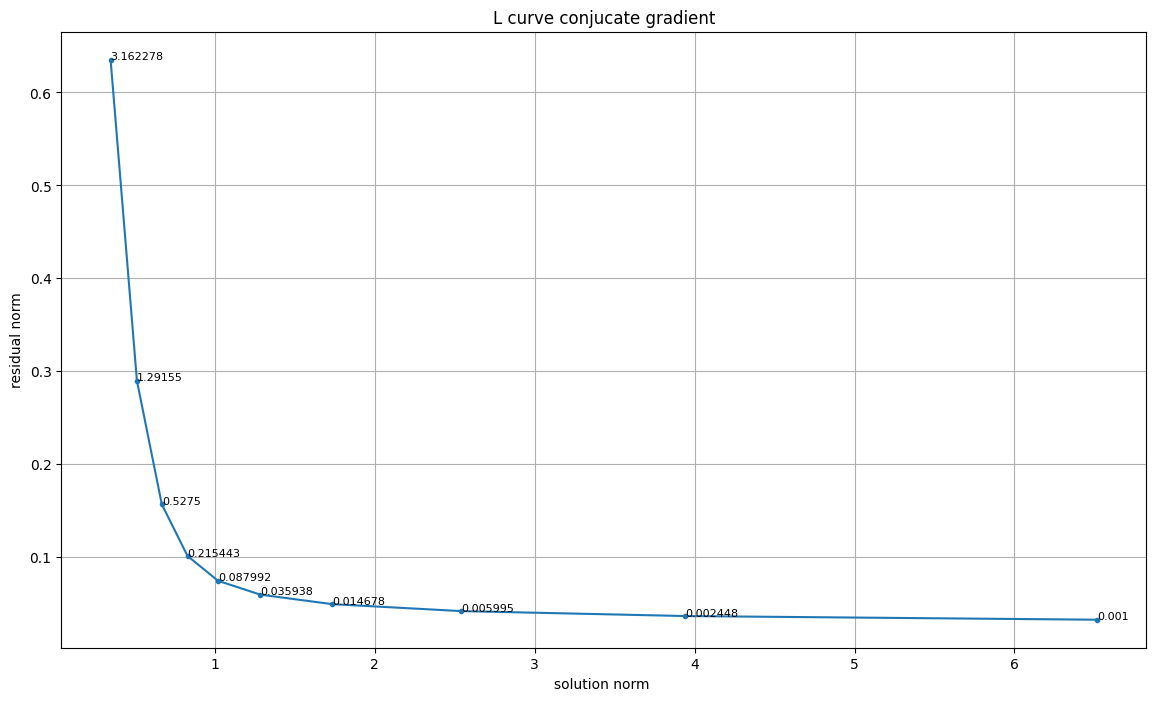

In [68]:
my_lambda=np.logspace(-3,0.5,10)
x=[]
y=[]
for i in my_lambda:
    x_sol_cg_noise_reg,itr=conj_grad_reg(A,dnew,xo,i,500,tol=0.000001)
    x.append((np.linalg.norm(x_sol_cg_noise_reg))**2) #calculating norm of solution 
    y.append((np.linalg.norm(dnew-np.dot(A,x_sol_cg_noise_reg)))**2) #calculating norm of residual 
plt.figure(figsize=(14, 8))
plt.plot(x,y,".-")
plt.title('L curve conjucate gradient')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],6)),fontsize=8)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'L_curve_cg.png')
plt.savefig(figure_path)
plt.show()     

# apply band pass filter and Q factor 

In [27]:
r_true=r
for i in my_lambda: 
    x_sol_cg_noise_reg,itr=conj_grad_reg(A,dnew,xo,i,500,tol=0.000001)
    r_sol=x_sol_cg_noise_reg
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

-4.8124 for lambda=0.001
-2.5076 for lambda=0.002448436746822227
-0.5983 for lambda=0.005994842503189409
0.8374 for lambda=0.014677992676220698
1.6799 for lambda=0.03593813663804628
2.0429 for lambda=0.0879922543569107
2.1189 for lambda=0.21544346900318845
2.02 for lambda=0.527499706370262
1.8144 for lambda=1.291549665014884
1.5352 for lambda=3.1622776601683795


In [28]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
for i in my_lambda: 
    x_sol_cg_noise_reg,itr=conj_grad_reg(A,dnew,xo,i,500,tol=0.000001)
    r_sol=x_sol_cg_noise_reg
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1, 3, 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

0.6724 for lambda=0.001
1.377 for lambda=0.002448436746822227
2.4546 for lambda=0.005994842503189409
3.8185 for lambda=0.014677992676220698
5.2154 for lambda=0.03593813663804628
6.3829 for lambda=0.0879922543569107
6.9782 for lambda=0.21544346900318845
6.6692 for lambda=0.527499706370262
5.6895 for lambda=1.291549665014884
4.4557 for lambda=3.1622776601683795


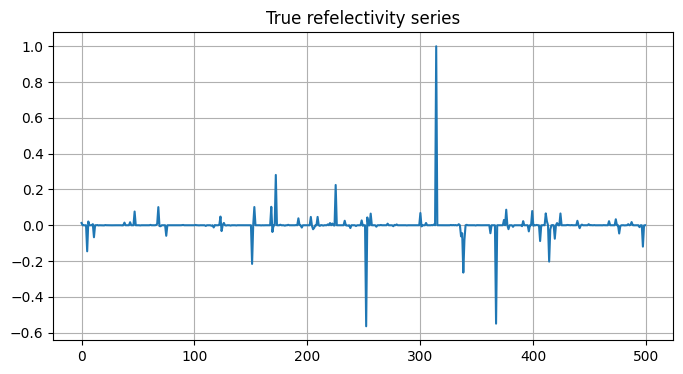

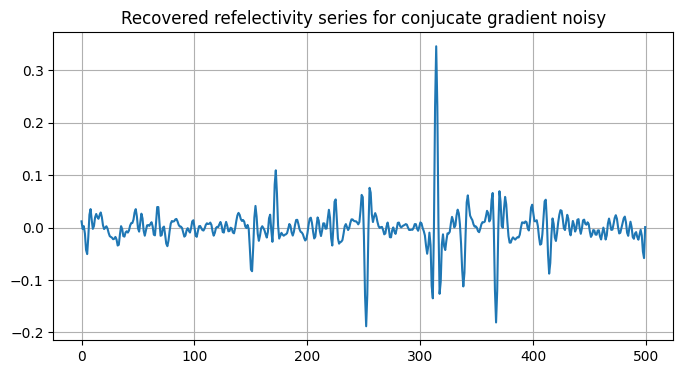

In [29]:
x_sol_cg_noise, final_iter_cg_noise=conj_grad_reg(A, dnew,xo,0.52,500,tol=0.000001)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_cg_noise)
plt.title('Recovered refelectivity series for conjucate gradient noisy')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'conj_noisy_reg.png')
plt.savefig(figure_path)

## using Re(x) norm  for gradient descent

In [30]:
from gd_Rex import *

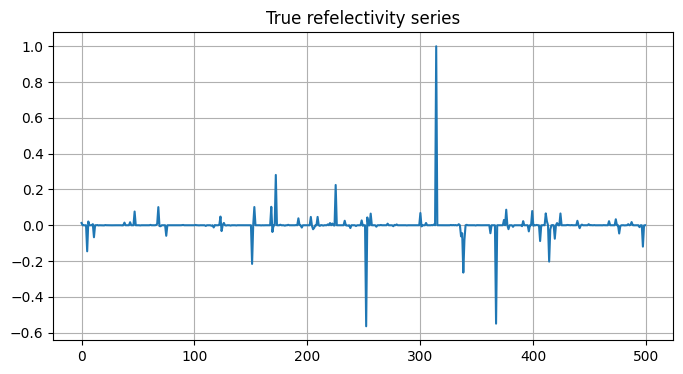

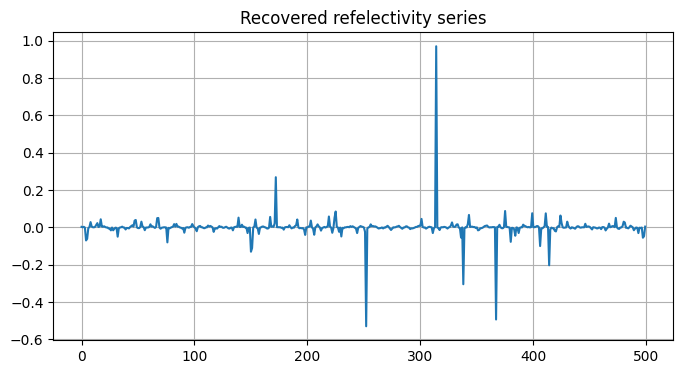

In [31]:
x_sol_reg_new,final_iter=gd_Rex(A,dnew,xo,0.04,5000,0.000001)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x_sol_reg_new)
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'gd_Re(x).png')
plt.savefig(figure_path)

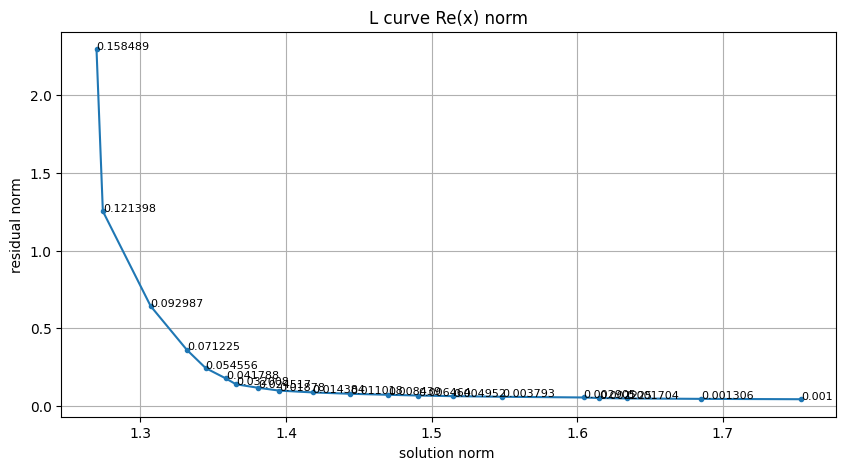

In [33]:
my_lambda=np.logspace(-3,-0.8,20)
# empty list for solution and residual norm
x=[]
y=[]
for i in my_lambda:
    e=0.000001    #epsilon
    x_sol_reg_new,final_iter=gd_Rex(A,dnew,xo,i,5000,0.000001)
    x.append((np.linalg.norm(np.sqrt(x_sol_reg_new**2+e**2))-e))#norm ofsolution 
    y.append((np.linalg.norm(dnew-np.dot(A,x_sol_reg_new)))**2)#norm of residual 
plt.figure(figsize=(10, 5))
plt.plot(x,y,".-")
plt.title('L curve Re(x) norm')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],6)),fontsize=8)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'L_curve_Re(x).png')
plt.savefig(figure_path)
plt.show()     

# apply band pass filter and Q factor 

In [35]:
r_true=r
for i in my_lambda: 
    x_sol_reg_new,final_iter=gd_Rex(A,dnew,xo,i,5000,0.000001)
    r_sol= x_sol_reg_new
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

-0.4031 for lambda=0.001
0.4612 for lambda=0.00130553786902303
1.4774 for lambda=0.0017044291274531946
2.4051 for lambda=0.0022251967709560286
3.3603 for lambda=0.002905078650510861
4.4297 for lambda=0.00379269019073225
5.0432 for lambda=0.004951500669473132
5.5182 for lambda=0.0064643716324900655
6.0543 for lambda=0.008439481965654007
6.6739 for lambda=0.011018063301098226
7.3316 for lambda=0.01438449888287663
8.1101 for lambda=0.018779508018514923
8.7209 for lambda=0.02451735887979288
9.2 for lambda=0.032008340465997674
9.5029 for lambda=0.04178810060294223
9.8752 for lambda=0.054555947811685226
9.8997 for lambda=0.07122485584859918
9.4088 for lambda=0.09298674652605267
8.7275 for lambda=0.12139771890700753
7.1068 for lambda=0.15848931924611134


In [36]:
r_true=r
r_true=r_true.reshape(500,1)
r_true=bp_filter(r_true,0.004,1, 3, 55, 65)
for i in my_lambda: 
    x_sol_reg_new,final_iter=gd_Rex(A,dnew,xo,i,5000,0.000001)
    r_sol= x_sol_reg_new
    r_sol=r_sol.reshape(500,1)
    r_sol=bp_filter(r_sol,0.004,1, 3, 55, 65)
    Q=quality_factor(r_sol,r_true)
    print(np.round(Q,4),"for lambda="+str(i))

2.6633 for lambda=0.001
3.136 for lambda=0.00130553786902303
3.7027 for lambda=0.0017044291274531946
4.2538 for lambda=0.0022251967709560286
4.8823 for lambda=0.002905078650510861
5.5494 for lambda=0.00379269019073225
6.1855 for lambda=0.004951500669473132
6.7785 for lambda=0.0064643716324900655
7.4095 for lambda=0.008439481965654007
8.1496 for lambda=0.011018063301098226
9.0014 for lambda=0.01438449888287663
9.9919 for lambda=0.018779508018514923
11.0515 for lambda=0.02451735887979288
11.9368 for lambda=0.032008340465997674
12.657 for lambda=0.04178810060294223
12.9286 for lambda=0.054555947811685226
12.5205 for lambda=0.07122485584859918
11.2146 for lambda=0.09298674652605267
9.1828 for lambda=0.12139771890700753
6.8544 for lambda=0.15848931924611134


# huber norm of solution and l2 norm of residual 

In [38]:
from huber import *

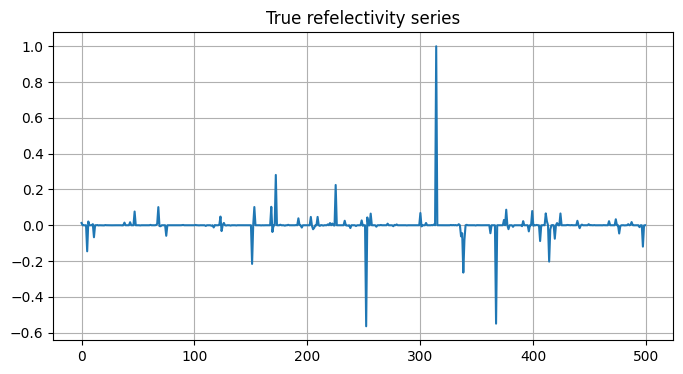

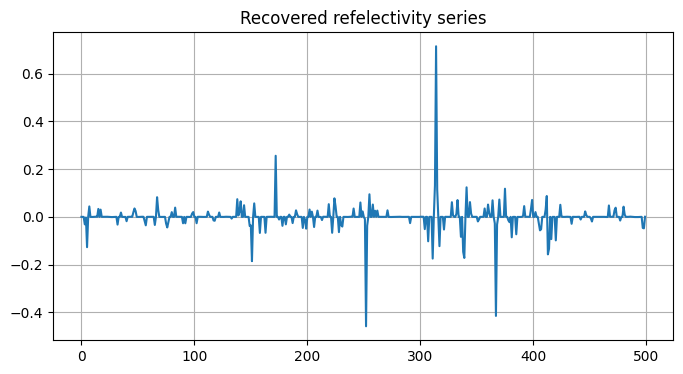

In [39]:
x_sol_huber_1,final_iter=huber(A,dnew,xo,0.15,501,0.001)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_huber_1)
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'huber.png')
plt.savefig(figure_path)

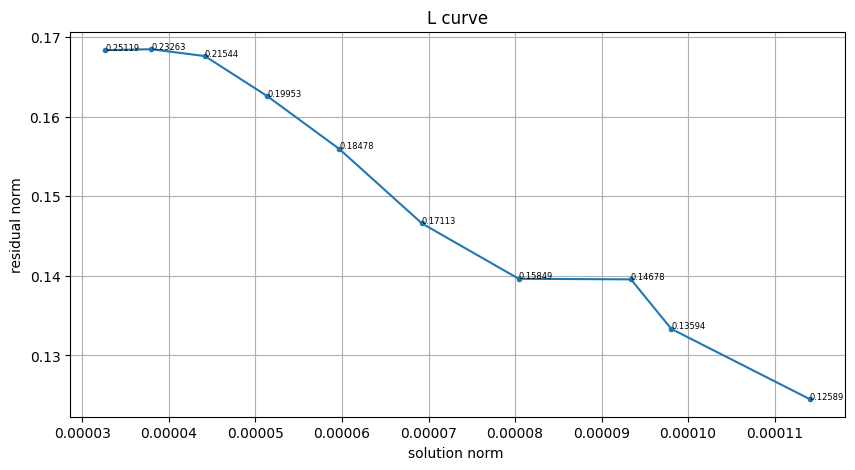

In [40]:
my_lambda=np.logspace(-0.9,-0.6,10)
x=[]
y=[]
for i in my_lambda:
    x_sol_huber_1,final_ite=huber(A,dnew,xo,i,501,0.001)
    for i in range(len(x_sol_huber_1)):
        epsilon=0.001
        x_sol_huber_term=np.zeros(len(x_sol_huber_1))
        if np.abs(x_sol_huber_1[i])<epsilon:
            x_sol_huber_term[i]=((x_sol_huber_1[i])**2)/(2*epsilon)
        else:
            x_sol_huber_term[i]=epsilon*np.abs(x_sol_huber_1[i])-(epsilon**2)/2
    x.append(np.linalg.norm(x_sol_huber_term))
    y.append((np.linalg.norm(np.dot(A,x_sol_huber_1)-dnew))**2)
plt.figure(figsize=(10,5))
plt.plot(x,y,".-")
plt.title('L curve')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],5)),fontsize=6)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'L_curve_huber.png')
plt.savefig(figure_path)    

# cauchy norm

In [23]:
from cauchy import *

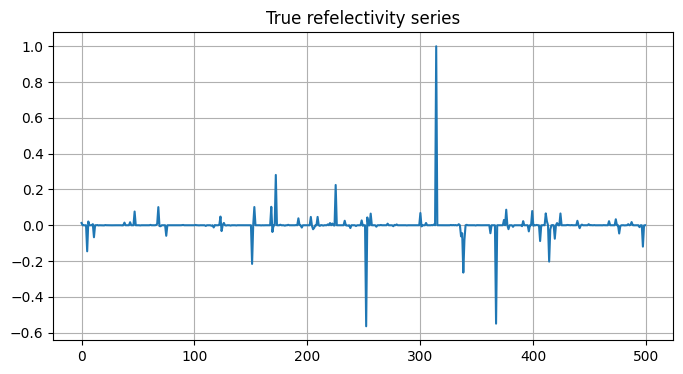

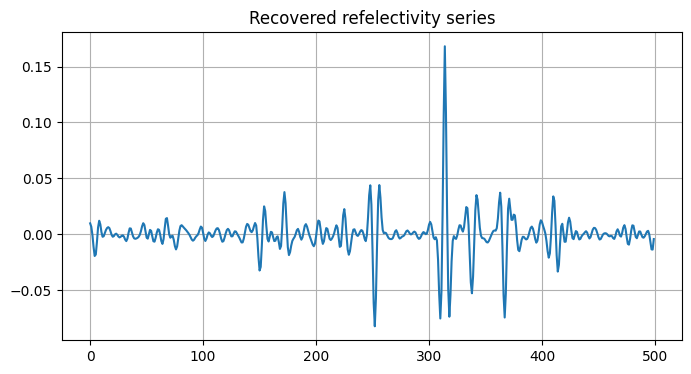

In [24]:

plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
x_sol_cauchy,itr=cauchy(A,dnew,xo,0.53,5000,0.1)
plt.figure(figsize=(8, 4))
plt.plot(x_sol_cauchy)
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'cauchy.png')
plt.savefig(figure_path)  

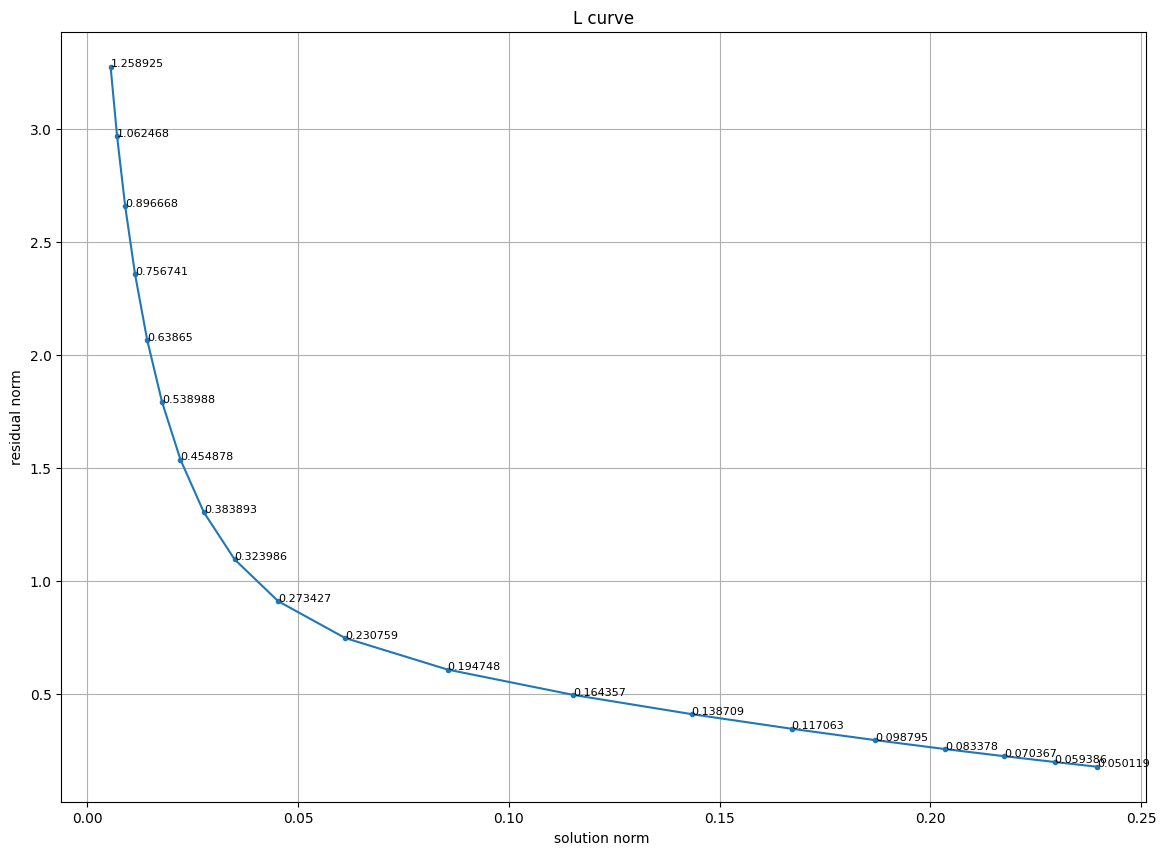

In [26]:
my_lambda=np.logspace(-1.3,0.1,20)
x=[]
y=[]
for i in my_lambda:
    x_sol_cauchy,itr=cauchy(A,dnew,xo,i,5000,0.1)
    x.append(np.linalg.norm(np.log(((x_sol_cauchy**2)/2)+1)))
    y.append((np.linalg.norm(np.dot(A,x_sol_cauchy)-dnew))**2)
plt.figure(figsize=(14, 10))
plt.plot(x,y,".-")
plt.title('L curve')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],6)),fontsize=8)

# IRLS

In [27]:
from irls import  *

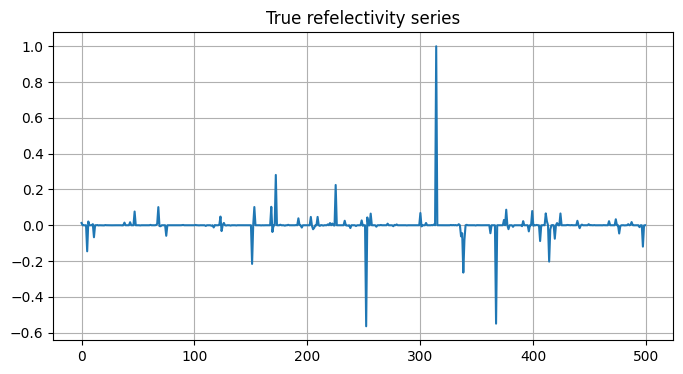

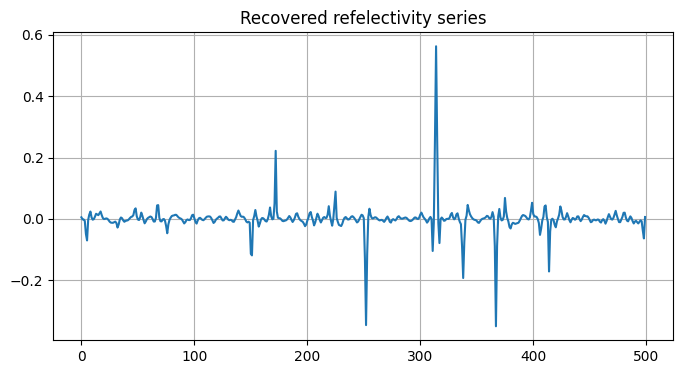

In [28]:
x_sol_irls,Q=irls(A,dnew,xo,0.005,20,50)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot((x_sol_irls))
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'irls.png')
plt.savefig(figure_path)

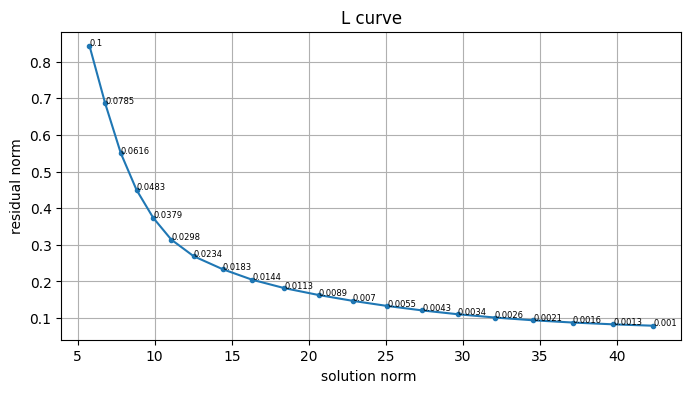

In [29]:
my_lambda=np.logspace(-3,-1,20)
xaxis=[]
yaxis=[]
for i in my_lambda:
    x_sol_irls,Q=irls(A,dnew,xo,i,20,50)
    xaxis.append((np.linalg.norm(Q*x_sol_irls))**2)
    yaxis.append((np.linalg.norm(np.dot(A,x_sol_irls)-dnew))**2)
plt.figure(figsize=(8, 4))
plt.plot(xaxis,yaxis,".-")
plt.title('L curve')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True) 
for i in range(len(xaxis)):
    plt.text(xaxis[i],yaxis[i],""+str(np.round(my_lambda[i],4)),fontsize=6)

# FISTA

In [30]:
from fista import  *
from power_method import  *

In [31]:
x0=np.random.normal(0,1,r.shape)
alpha=power_method(x0,A , num_iter=15)

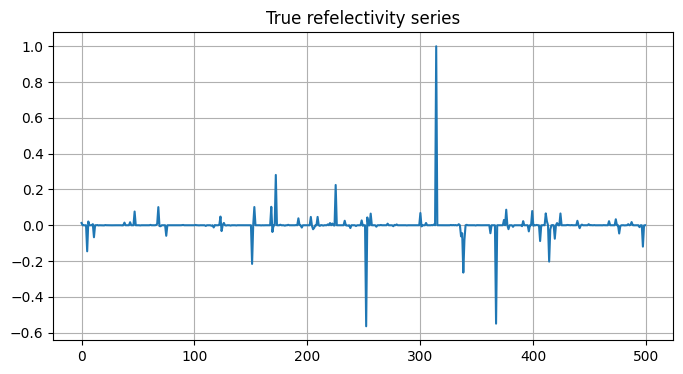

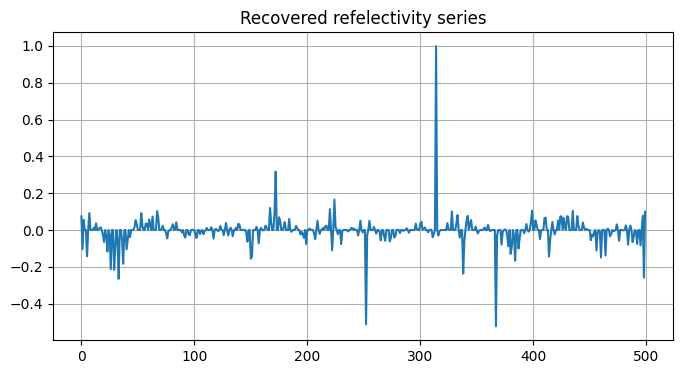

In [32]:
x_sol_fista,J=fista(dnew, A, 0.003, alpha, 500)
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.figure(figsize=(8, 4))
plt.plot((x_sol_fista))
plt.title('Recovered refelectivity series')
plt.grid(True)
directory = './results/noisy_data'
figure_path = os.path.join(directory,'fista.png')
plt.savefig(figure_path)

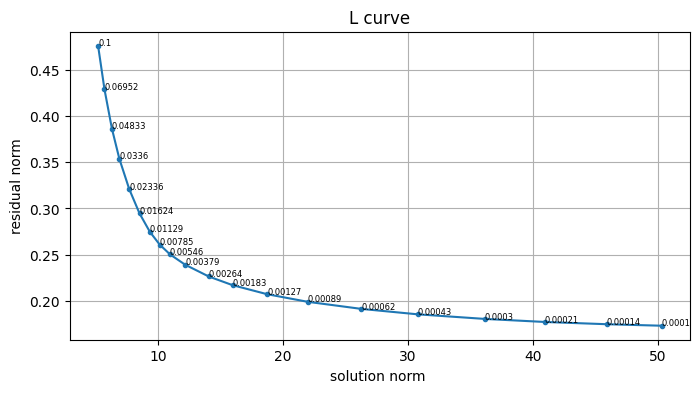

In [33]:
my_lambda=np.logspace(-4,-1,20)
x=[]
y=[]
for i in my_lambda:
    x_sol_fista,J=fista(dnew, A, i, alpha, 500)
    x.append(np.linalg.norm(np.sum(np.abs(x_sol_fista))))
    y.append((np.linalg.norm(np.dot(A,x_sol_fista)-dnew)))
plt.figure(figsize=(8, 4))
plt.plot(x,y,".-")
plt.title('L curve')
plt.ylabel("residual norm")
plt.xlabel("solution norm ")
plt.grid(True)   
for i in range(len(x)):
    plt.text(x[i],y[i],""+str(np.round(my_lambda[i],5)),fontsize=6)
# saving the L curve     
directory = './results/noisy_data'
figure_path = os.path.join(directory,'Lcurve_fista.png')
plt.savefig(figure_path)
plt.show()        

# blind deconvolution

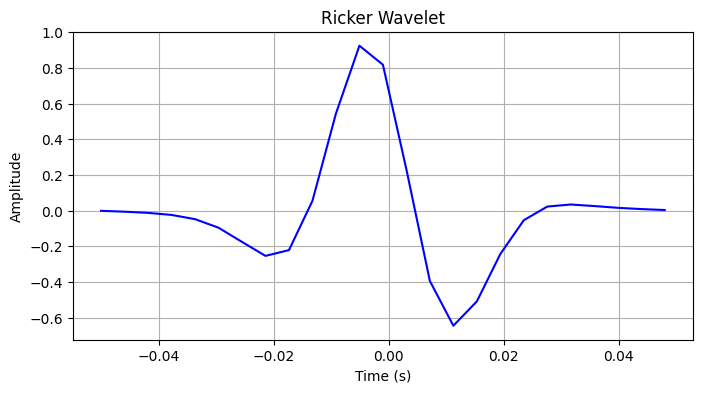

In [69]:
y,t = ricker_wavelet(25, 0.004, 0.1,np.pi/4)
directory = '.\data'
filename = os.path.join(directory, 'ricker_blind.mat')
savemat(filename, {'y': y})
# plotting the wavelet
plt.figure(figsize=(8, 4))
plt.plot(t, y, color='blue')
plt.title('Ricker Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [70]:
d,dnew=generate_data(y,r,4)
p=len(d)

In [71]:
wo,t=ricker_wavelet(25, dt, length,0)
q=len(wo)
xo=np.hstack((np.zeros(p-q+1)))
W=toep(p,wo)

In [72]:
def blind_decon(xo,d,l1,l2,it,ot):
    import numpy as np
    p=len(d)
    ro=xo
    wo,t=ricker_wavelet(25, dt, length,0)
    for i in range(5000):
        w1=wo
        W=toep(p,wo)
        ro,itr=conj_grad_reg(W, d, ro,l1,it,tol=0.000001)
        R=toep(p,ro)
        wo,itr=conj_grad_reg(R, d, wo,l2,ot,tol=0.00001)
        if np.linalg.norm(w1-wo)<0.000001:
            print(i)
            break
        else:
            continue
    return wo,ro 

In [73]:
wo,ro=blind_decon(xo,d,0.01,0.2,500,50)

Text(0, 0.5, 'Ampltude')

<Figure size 640x480 with 0 Axes>

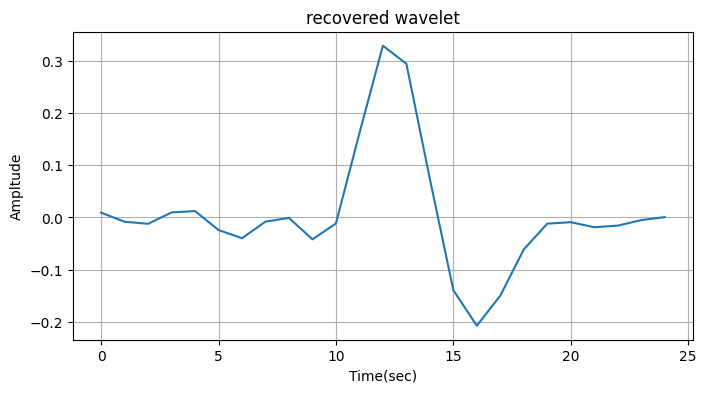

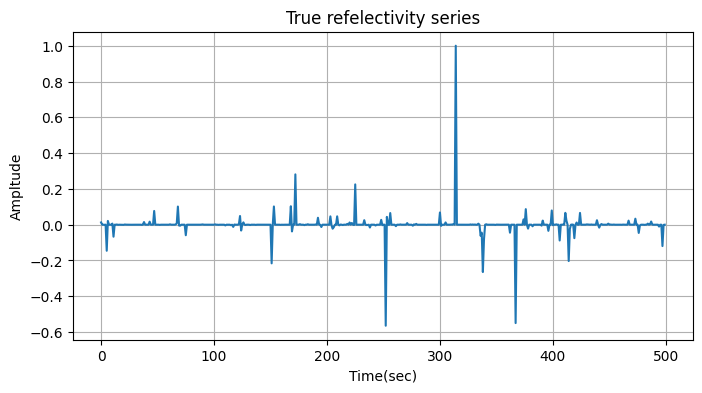

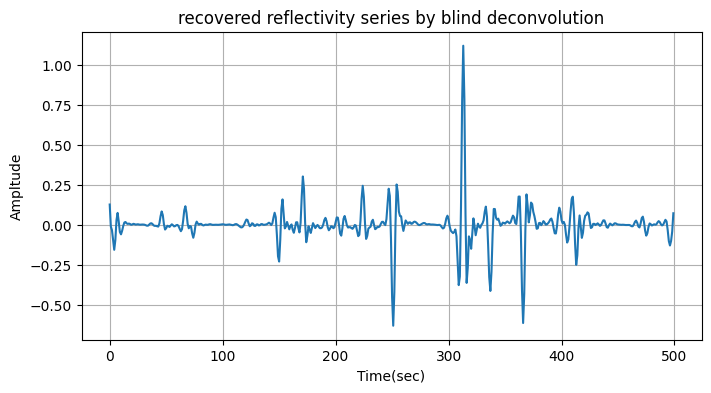

In [75]:
plt.figure(1)
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(wo)
plt.title("recovered wavelet")
plt.xlabel("Time(sec)")
plt.ylabel("Ampltude")
plt.figure(2)
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(r)
plt.title('True refelectivity series')
plt.xlabel("Time(sec)")
plt.ylabel("Ampltude")
plt.figure(3)
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(ro);
plt.title("recovered reflectivity series by blind deconvolution")
plt.xlabel("Time(sec)")
plt.ylabel("Ampltude")